# 911 Calls Capstone Project

**For this capstone project I have used to analyze some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert).**

## Data and Setup

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

**Reading CSV file as a dataframe called df**

In [33]:
df = pd.read_csv('911.csv')

**Checking the info() of the df**

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Checking the head of df**

In [36]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Counting Unique Values

**What are the top 5 zipcodes for 911 calls?**

In [37]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**What are the top 5 townships (twp) for 911 calls?**

In [38]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**how many unique title codes are there?**

In [39]:
df['title'].nunique()

110

## Finding Reasons Data

**In the data there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Using .apply() function with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.**

In [40]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

**What is the most common Reason for a 911 call based off of this new column?**

In [41]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

**Now using seaborn to create a countplot of 911 calls by Reason.**

<Axes: xlabel='Reason', ylabel='count'>

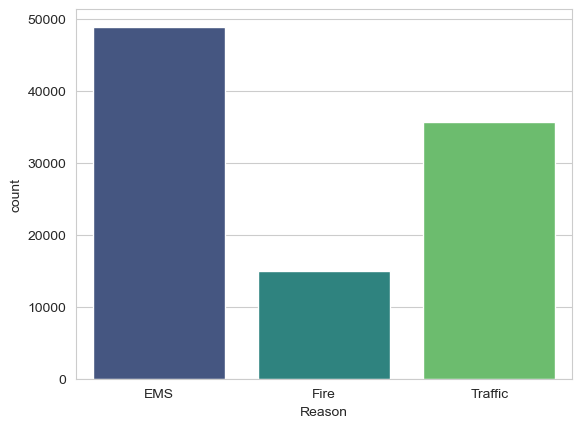

In [42]:
sns.countplot(data=df,x='Reason',palette='viridis')

___
**What is the data type of the objects in the timeStamp column?**

In [43]:
type(df['timeStamp'].iloc[0])

str

**You should have seen that these timestamps are still strings. Now I need to convert the column from strings to DateTime objects.**

In [72]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

**Now that the timestamp column are actually DateTime objects, using .apply() function to create 3 new columns called Hour, Month, and Day of Week.**

In [52]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

**Notice how the Day of Week is an integer 0 - 6. Using the .map() I am going to create a dictionary to map the actual string names to the day of the week:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [46]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [47]:
df['Day of Week'] = df['Day of Week'].map(dmap)

## Finding Reasons by Hour, Month, Day of Week

**Now using seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

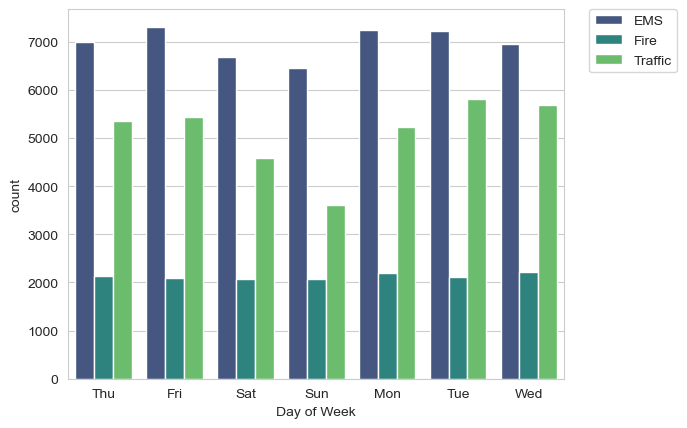

In [48]:
sns.countplot(data=df,x='Day of Week',hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Now for Month:**

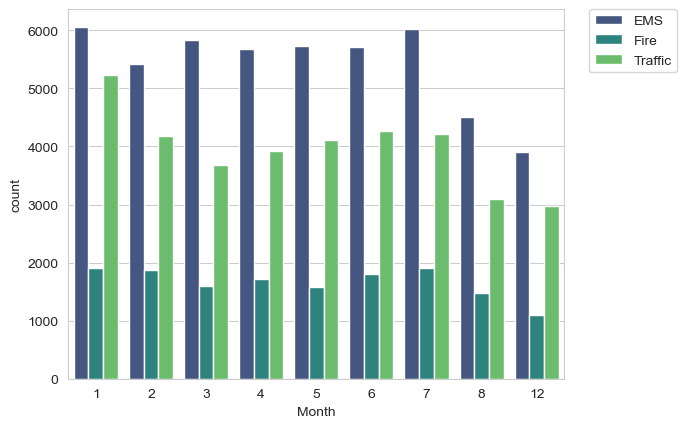

In [49]:
sns.countplot(data=df,x='Month',hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Did you notice something strange about the Plot?**

_____

**In this Month countplot missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months.**

**Now creating a gropuby object called byMonth, you can group the DataFrame by the month column and by using the count() method for aggregation.**

In [50]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


**Now creating a simple plot off of the dataframe indicating the count of calls per month.**

<Axes: xlabel='Month'>

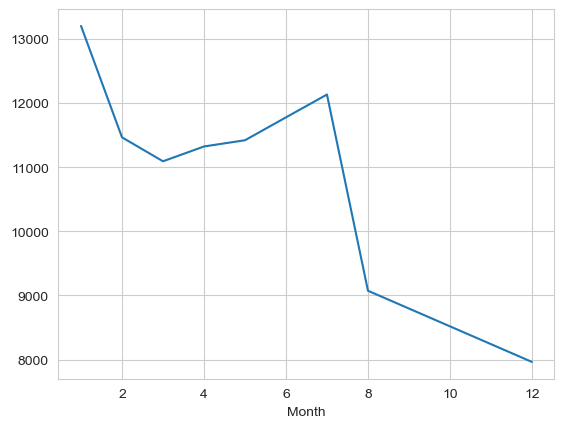

In [54]:
byMonth['twp'].plot()

**Now using seaborn's lmplot() to create a linear fit on the number of calls per month.**

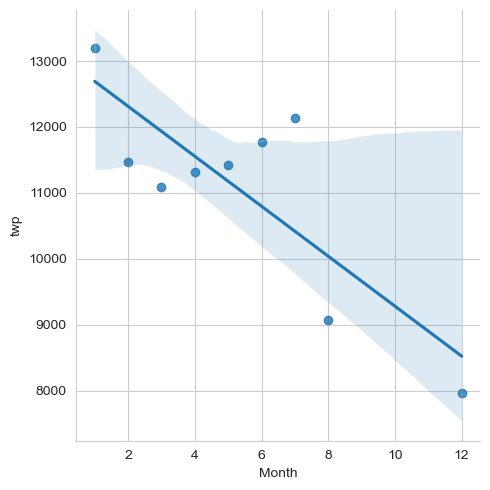

In [55]:
sns.lmplot(x = 'Month', y = 'twp', data=byMonth.reset_index())

**Creating a new column called 'Date' that contains the date from the timeStamp column. Which will visualize the 911 call data more clearly** 

In [56]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

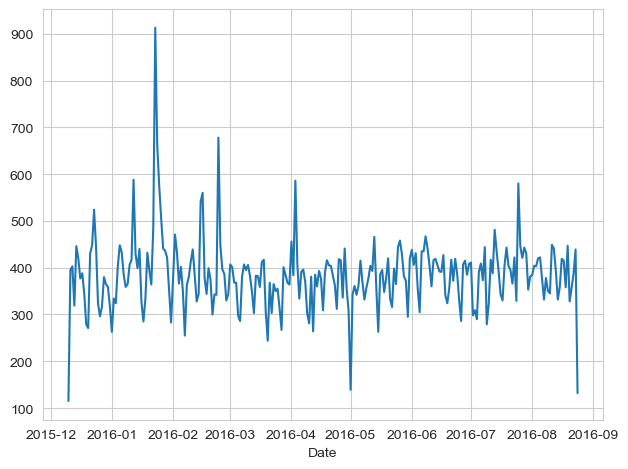

In [59]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

## Finding Reason by Date wise

**Now recreating this plot by creating 3 separate plots with each plot representing a Reason for the 911 call**

Text(0.5, 1.0, 'Traffic')

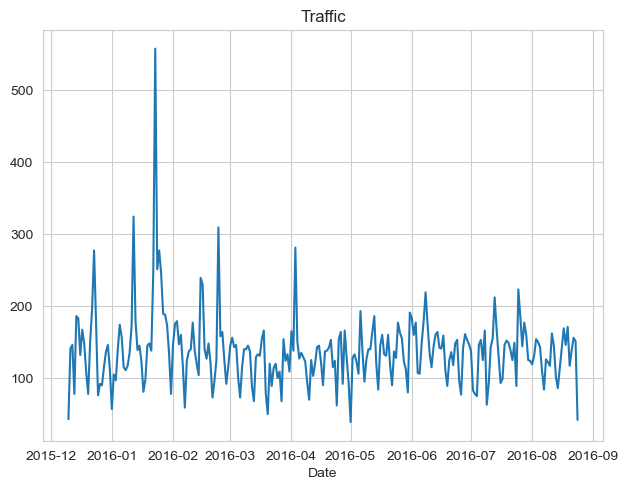

In [60]:
df[df['Reason']=='Traffic'].groupby('Date').count()['Reason'].plot()
plt.tight_layout()
plt.title('Traffic')

Text(0.5, 1.0, 'Fire')

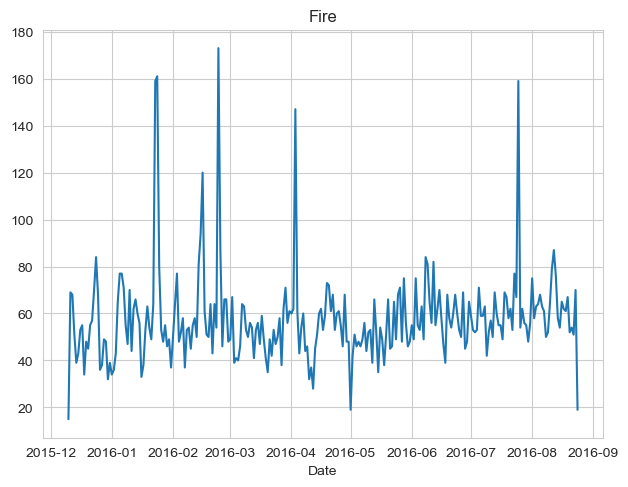

In [61]:
df[df['Reason']=='Fire'].groupby('Date').count()['Reason'].plot()
plt.tight_layout()
plt.title('Fire')

Text(0.5, 1.0, 'EMS')

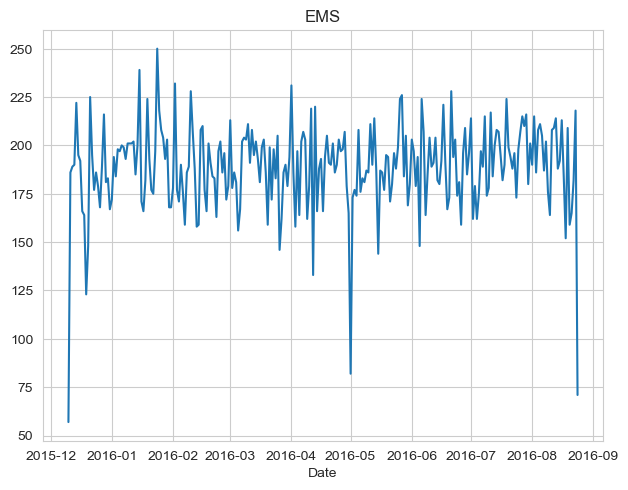

In [62]:
df[df['Reason']=='EMS'].groupby('Date').count()['Reason'].plot()
plt.tight_layout()
plt.title('EMS')

## Finding Reason by Day of week and Hour

____
**Now to know more by hourly and day wise.For that I need to use heat map. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.**

In [65]:
dayHour = df.groupby(by = ['Day of Week', 'Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
0,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
1,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
2,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
3,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
4,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474


**creating a HeatMap using this new DataFrame.**

<Axes: xlabel='Hour', ylabel='Day of Week'>

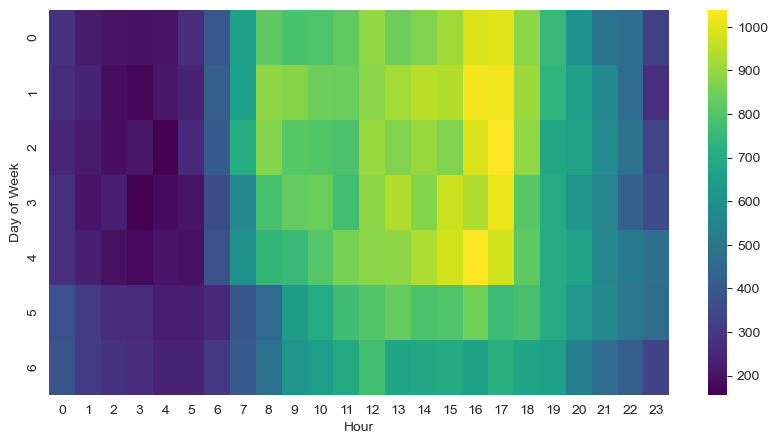

In [66]:
plt.figure(figsize=(10,5))
sns.heatmap(dayHour,cmap='viridis')

**Creating a clustermap using this DataFrame.**

<Figure size 500x500 with 0 Axes>

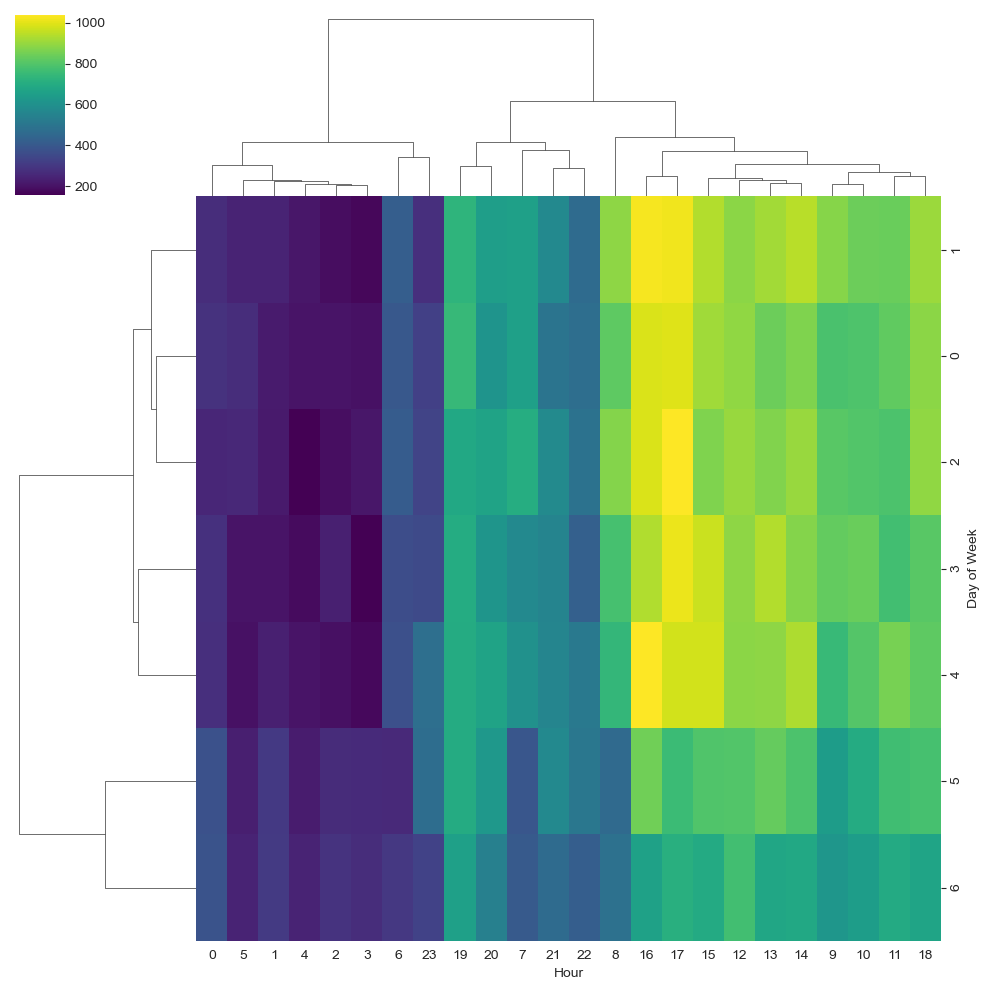

In [67]:
plt.figure(figsize=(5,5))
sns.clustermap(dayHour,cmap='viridis')

## Finding Reason by Day of week and Month

**Now make the column from Hour to Month that shows the Month as the column.**

In [68]:
dayMonth = df.groupby(by = ['Day of Week', 'Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
0,1727,1964,1535,1598,1779,1617,1692,1511,1257
1,1973,1753,1884,1430,1918,1676,1670,1612,1234
2,1700,1903,1889,1517,1538,2058,1717,1295,1262
3,1584,1596,1900,1601,1590,2065,1646,1230,1266
4,1970,1581,1525,1958,1730,1649,2045,1310,1065


<Axes: xlabel='Month', ylabel='Day of Week'>

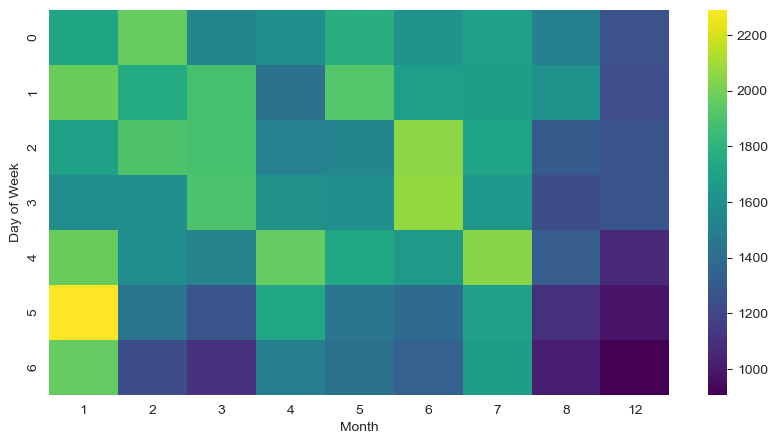

In [70]:
plt.figure(figsize=(10,5))
sns.heatmap(dayMonth,cmap='viridis')

<Figure size 1000x500 with 0 Axes>

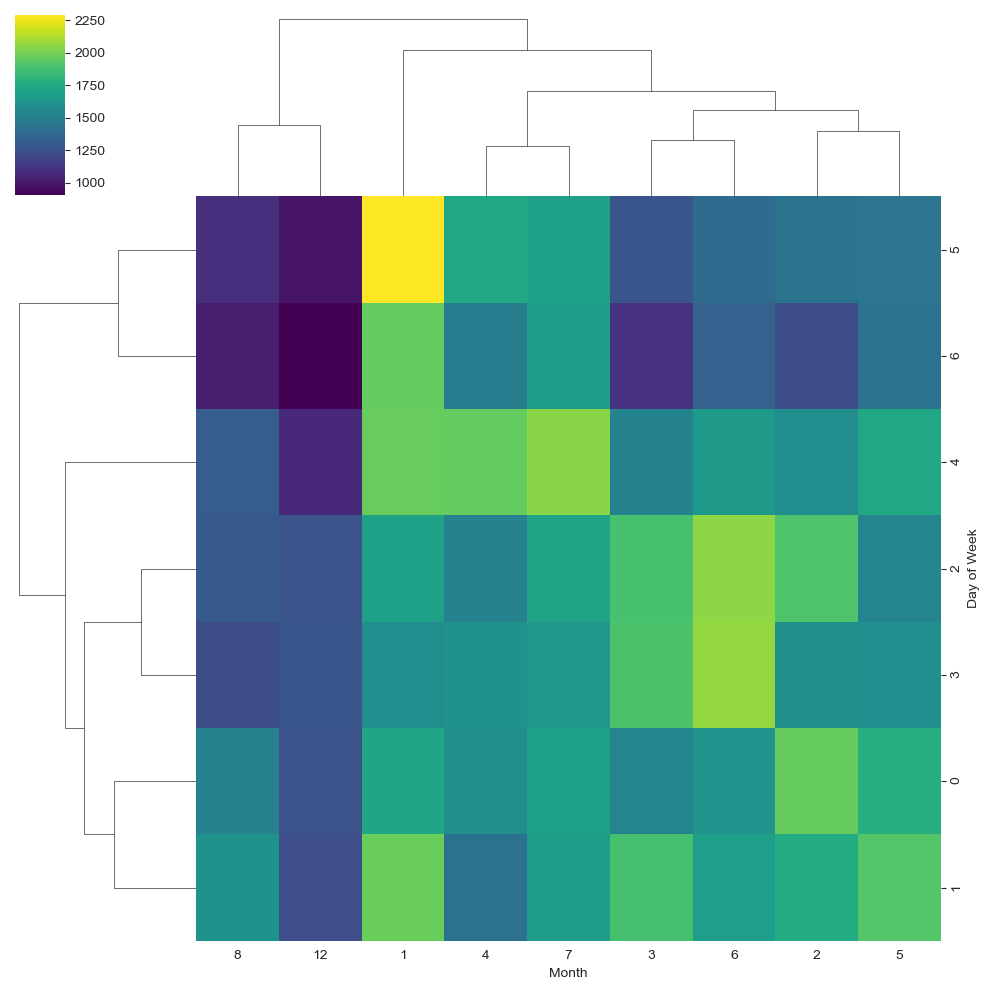

In [71]:
plt.figure(figsize=(10,5))
sns.clustermap(dayMonth,cmap='viridis')

## Thank You!